# Impact-of-covid-19-on-digital-learning 

        **prepared by Nelson_Otuma_Ongaya**
         

## Problem Statement
+ The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

**Questions to be answered**
Below are some of questions that relate to our problem statement:

+ What is the picture of digital connectivity and engagement in 2020?
+ What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
+ How does student engagement with different types of education technology change over the course of the pandemic?
+ How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
+ Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?

In [1]:
#import the required libraries for data preprocessing
import glob
import warnings
import plotly as py
import numpy as np 
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import statistics as stat
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
districts = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
products = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')

eng_path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'
eng_files = glob.glob(eng_path + "/*.csv")

In [3]:
files = []

for file in eng_files:
    df = pd.read_csv(file, index_col = None, header = 0)
    district_id = file.split('/')[4].split('.')[0]
    df['district_id'] = district_id
    files.append(df)
    
engagement = pd.concat(files)
engagement = engagement.reset_index(drop = True)
engagement['time'] = pd.to_datetime(engagement['time'])

**PRODUCTS**

- The product file includes information about the characteristics of the top 372 products with most users in 2020:

+ LP ID - the unique identifier of the product.
+ URL
+ Product Name
+ Provider/Company Name
+ Sector(s) - sector of education where the product is used.
+ Primary Essential Function - the basic function of the product. There are two layers of labels here. Products are first + + + + labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District +  + Operations. Each of these categories have multiple sub-categories with which the products were labeled.

In [4]:
#we preview the first rows to understand the dataset
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#preview the number of records
districts.shape

(233, 7)

In [6]:
#Previewing the last few records
districts.tail()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN
232,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [7]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [8]:
round(len(districts.query("state != state")) / len(districts) * 100, 1)

24.5

we already have missing 24.5% as the missing information.

In [9]:
districts.dropna(inplace = True)

In [10]:
for i in ['pct_black/hispanic', 'pct_free/reduced']:
    districts[i] = districts[i].apply(lambda x: float(x.split(',')[0][1:]) + 0.1)

districts['pp_total_raw'] = districts['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)

districts.drop('county_connections_ratio', axis = 1, inplace = True)

districts.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,15000
2,4921,Utah,Suburb,0.1,0.3,7000
5,5987,Wisconsin,Suburb,0.1,0.1,11000


In [11]:
products.head(3)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [13]:
products['Basic_category'] = 'x'
for i in range(len(products)):
    if pd.isna(products['Primary Essential Function'][i]) == False:
        products['Basic_category'][i] = products['Primary Essential Function'][i].split('-')[0][:-1]
        
products.head(3)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC


**Lets Check on Engagement data and Explore it**
+ The engagement file includes information about engagement of students with learning products in various school districts for the entire year 2020:

+ time - date.
+ lp_id - the unique identifier of the product.
+ pct_access - percentage of students in the district have at least one page-load event of a given product and on a given day.
+ engagement_index - total page-load events per one thousand students of a given product and on a given day.
+ district_id

In [14]:
engagement.head(3)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345


The dataset has time,lp-id,pct_access,engagement-index,district

# How many Districts do we have? Lets answer this question
We can then visualize the districts and get the count for the districts.

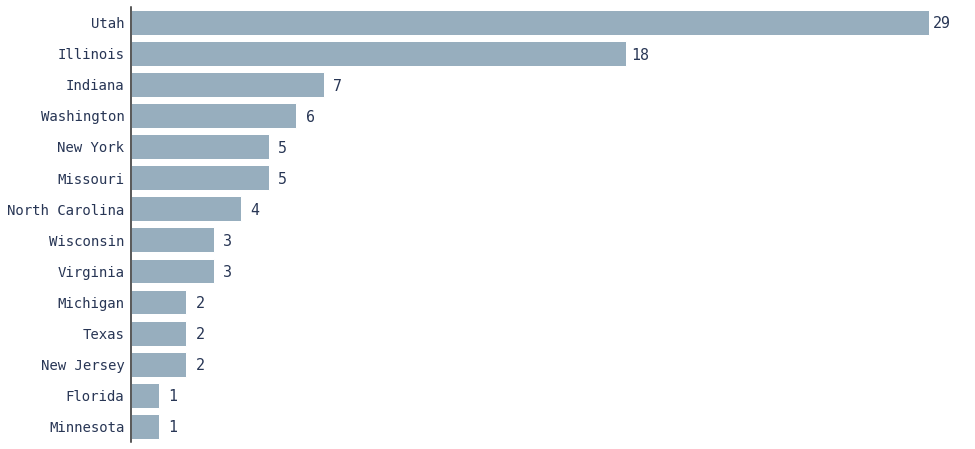

In [15]:
state_abb = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

districts['state_abb'] = districts['state'].map(state_abb)

fig = go.Figure()
layout = dict(
    title_text = "Count of districts in the available States",
    title_font = dict(
            family = "monospace",
            size = 25,
            color = "black"
            ),
    geo_scope = 'usa'
)

fig.add_trace(
    go.Choropleth(
        locations = districts['state_abb'].value_counts().to_frame().reset_index()['index'],
        zmax = 1,
        z = districts['state_abb'].value_counts().to_frame().reset_index()['state_abb'],
        locationmode = 'USA-states',
        marker_line_color = 'white',
        geo = 'geo',
        colorscale = "cividis", 
    )
)
            
fig.update_layout(layout)   
fig.show()

plt.figure(figsize = (15, 8))
sns.set_style("white")
a = sns.barplot(data = districts['state'].value_counts().reset_index(), x = 'state', y = 'index', color = '#90afc5')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, color = '#283655')
plt.ylabel('')
plt.xlabel('')

a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 15, color = '#283655')

plt.show()

In [16]:
fig = px.pie(districts['locale'].value_counts().reset_index().rename(columns = {'locale': 'count'}), values = 'count', names = 'index', width = 700, height = 700)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7, 
                  marker = dict(colors = ['#90afc5','#336b87','#2a3132','#763626'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = ' The count of districts <br>in each type <br>of areas', 
                                      x = 0.5, y = 0.5, font_size = 26, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

# ******Can we get the distribution of characteristics of schools?**

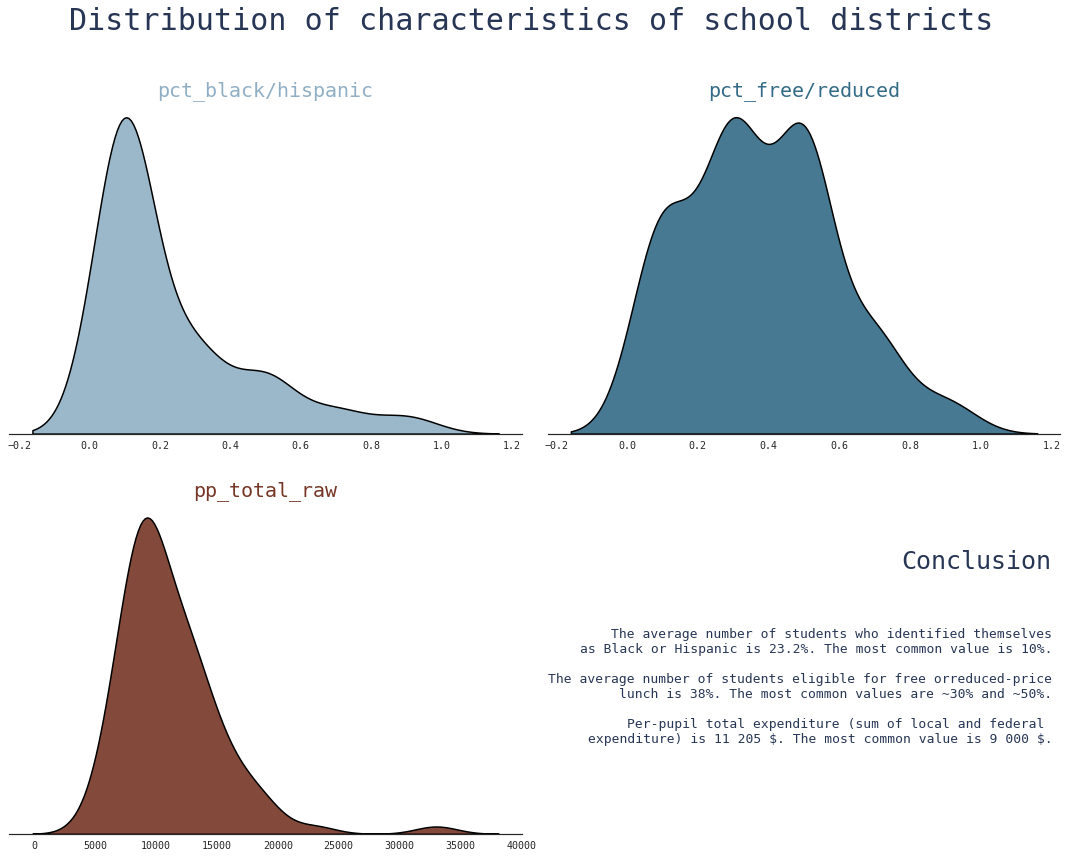

In [17]:
colors = ['#90afc5', '#336b87', '#763626']

fig = plt.figure(figsize = (15, 11))
for i in range(len(districts.columns.tolist()[3:6])):
    plt.subplot(2, 2, i+1)
    sns.set_style("white")
    plt.title(districts.columns.tolist()[3:6][i], size = 20, fontname = 'monospace', color = colors[i])
    a = sns.kdeplot(districts[districts.columns.tolist()[3:6][i]], color = colors[i], shade = True, alpha = 0.9, linewidth = 1.5, edgecolor = 'black')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace')
    plt.yticks([])
    for j in ['right', 'left', 'top']:
        a.spines[j].set_visible(False)
        a.spines['bottom'].set_linewidth(1.2)
        
fig.tight_layout(h_pad = 3)

plt.figtext(0.07, 1.05, 'Distribution of characteristics of school districts', fontsize = 30, fontname = 'monospace', color = '#283655')

plt.figtext(0.84, 0.37, 'Conclusion', fontsize = 25, fontname = 'monospace', color = '#283655')

plt.figtext(0.98, 0.15, '''The average number of students who identified themselves
as Black or Hispanic is 23.2%. The most common value is 10%.

The average number of students eligible for free orreduced-price
lunch is 38%. The most common values are ~30% and ~50%.

Per-pupil total expenditure (sum of local and federal 
expenditure) is 11 205 $. The most common value is 9 000 \$.''', fontsize = 13, fontname = 'monospace', color = '#283655', ha = 'right')

plt.show()

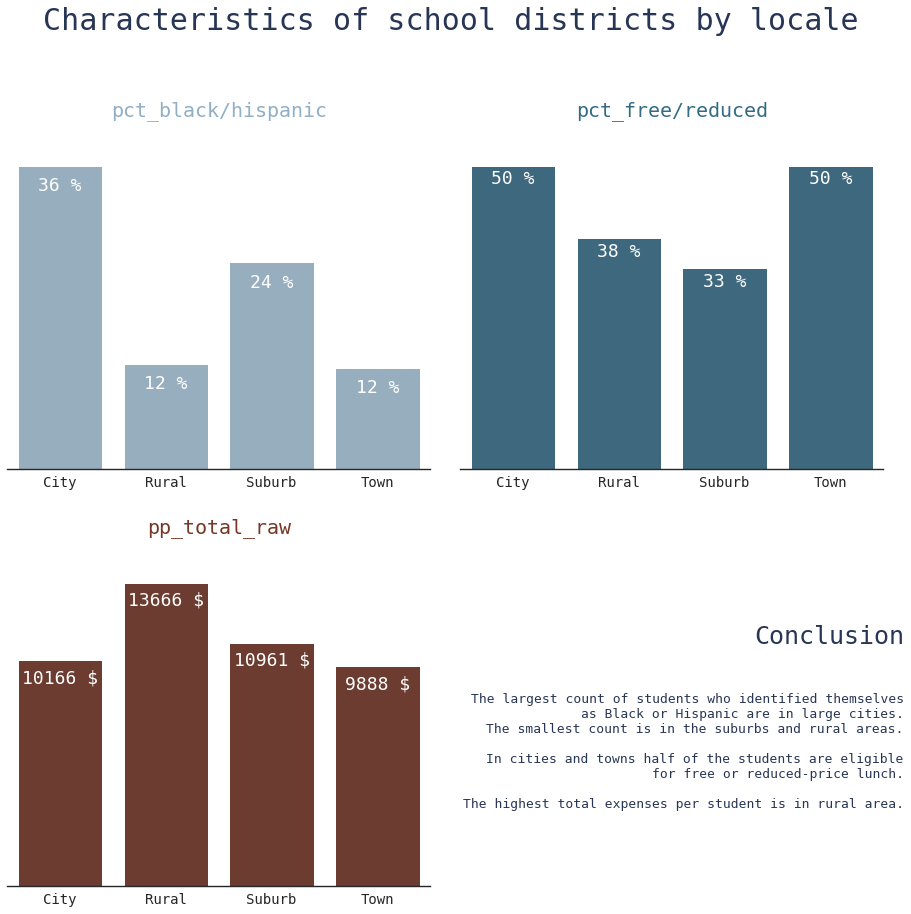

In [18]:
dist_area_group = districts.groupby('locale').agg({'pct_black/hispanic': 'mean', 'pct_free/reduced': 'mean', 'pp_total_raw': 'mean'}).reset_index()

colors = ['#90afc5', '#336b87', '#763626']

fig = plt.figure(figsize = (13, 12))
for i in range(len(dist_area_group.columns.tolist()[1:])):
    plt.subplot(2, 2, i+1)
    sns.set_style("white")
    plt.title(dist_area_group.columns.tolist()[1:][i], size = 20, fontname = 'monospace', y = 1.09, color = colors[i])
    plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
    a = sns.barplot(data = dist_area_group, x = 'locale', y = dist_area_group.columns.tolist()[1:][i], color = colors[i])
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace', size = 14)
    plt.yticks([])
    
    for j in ['right', 'top', 'left']:
        a.spines[j].set_visible(False)
    for j in ['bottom']:
        a.spines[j].set_linewidth(1.4)
      
    if i < 2:
        for p in a.patches:
            height = p.get_height()
            a.annotate(f'{int(height*100)} %', (p.get_x() + p.get_width() / 2, p.get_height()-0.03), 
                   ha = 'center', va = 'center', 
                   size = 18,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   color = 'white',
                   fontname = 'monospace')
    else:
        for p in a.patches:
            height = p.get_height()
            a.annotate(f'{int(height)} $', (p.get_x() + p.get_width() / 2, p.get_height()-1000), 
                   ha = 'center', va = 'center', 
                   size = 18,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   color = 'white',
                   fontname = 'monospace')
            
plt.figtext(0.07, 1.05, 'Characteristics of school districts by locale', fontsize = 30, fontname = 'monospace', color = '#283655')

plt.figtext(0.83, 0.34, 'Conclusion', fontsize = 25, fontname = 'monospace', color = '#283655')

plt.figtext(0.99, 0.15, '''The largest count of students who identified themselves
as Black or Hispanic are in large cities.
The smallest count is in the suburbs and rural areas.

In cities and towns half of the students are eligible
for free or reduced-price lunch.

The highest total expenses per student is in rural area.''', fontsize = 13, fontname = 'monospace', color = '#283655', ha = 'right')
        
fig.tight_layout(pad = 3)

plt.show()

# # Products

# Lets check for Top 15 of learning product companies

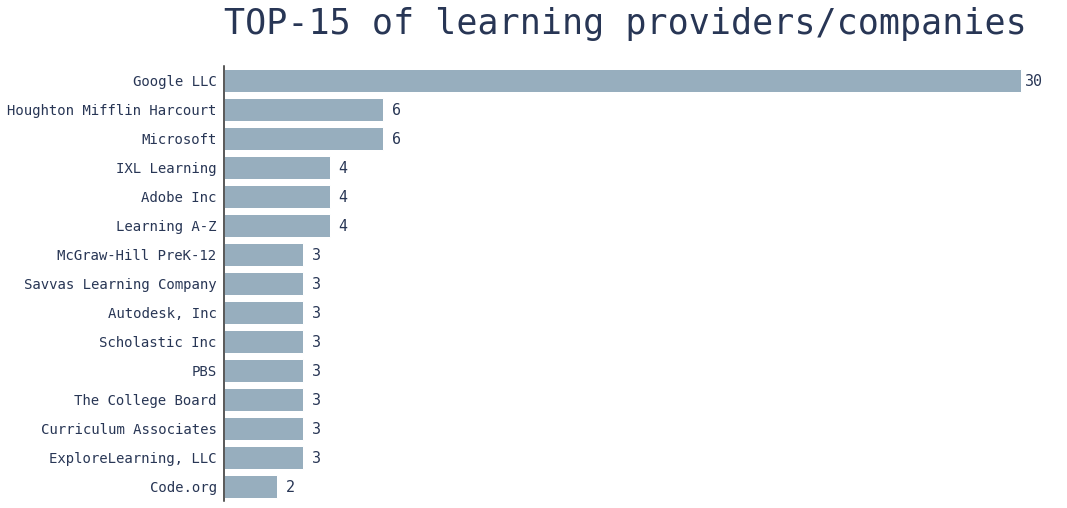

In [19]:
# Lets loop through and check for any errors how many people have an error.
for i in [' ', '.']:
    for k in range(len(products)):
        if pd.isna(products['Provider/Company Name'][k]) == False:
            products['Provider/Company Name'][k] = products['Provider/Company Name'][k].strip(i)

# Let's fix the long name
products['Provider/Company Name'] = np.where(products['Provider/Company Name'] == 'Savvas Learning Company | Formerly Pearson K12 Learning', 'Savvas Learning Company', products['Provider/Company Name'])

plt.figure(figsize = (15, 8))
sns.set_style("white")
plt.title('TOP-15 of learning providers/companies', size = 35, x = 0.48, y = 1.06, fontname = 'monospace', color = '#283655')
a = sns.barplot(data = products['Provider/Company Name'].value_counts().reset_index().head(15), x = 'Provider/Company Name', y = 'index', color = '#90afc5')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, color = '#283655')
plt.ylabel('')
plt.xlabel('')

a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 15, color = '#283655')

plt.show()

In [20]:
fig = px.pie(products['Sector(s)'].value_counts().reset_index().rename(columns = {'Sector(s)': 'count'}).head(15), values = 'count', names = 'index', width = 700, height = 700)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7, 
                  marker = dict(colors = ['#90afc5','#336b87','#2a3132','#763626', 'a43820'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Sector of education <br>where the product is used', 
                                      x = 0.5, y = 0.5, font_size = 26, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

# Can we get the count for sub category?
we now answer this question by creating functions for subcatergory

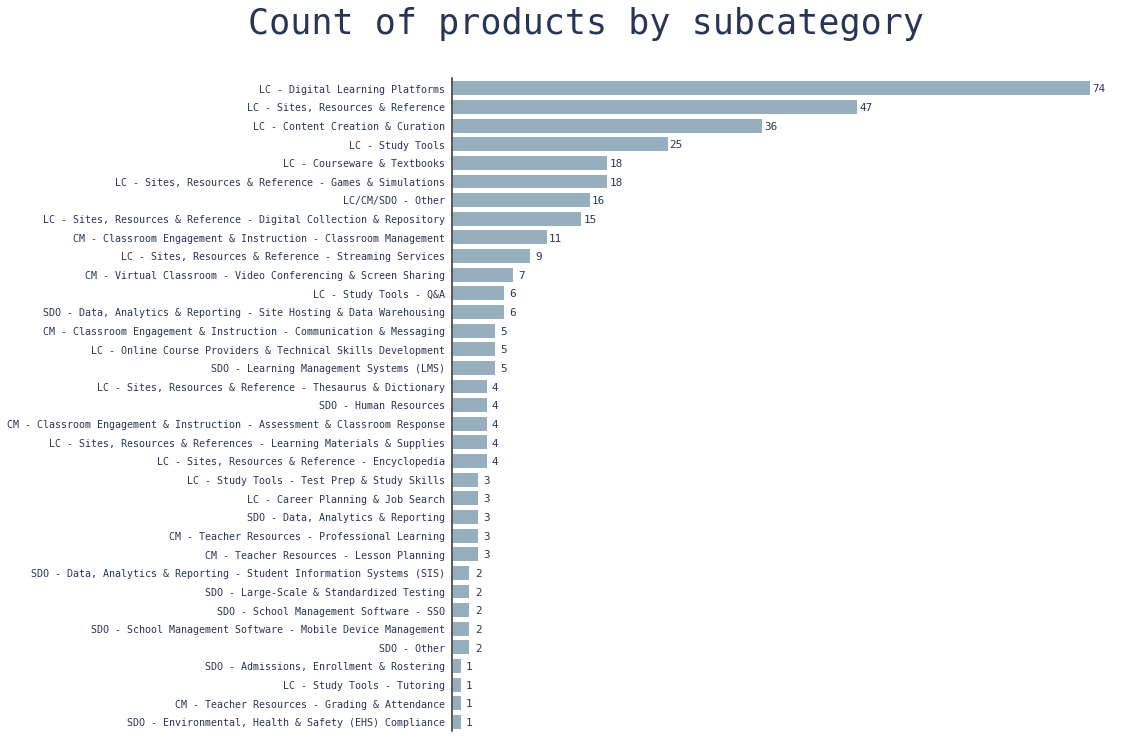

In [21]:
plt.figure(figsize = (12, 12))
sns.set_style("white")
plt.title('Count of products by subcategory', size = 35, x = 0.2, y = 1.06, fontname = 'monospace', color = '#283655')
a = sns.barplot(data = products['Primary Essential Function'].value_counts().reset_index(), x = 'Primary Essential Function', y = 'index', color = '#90afc5')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 10, color = '#283655')
plt.ylabel('')
plt.xlabel('')

a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(1 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 11, color = '#283655')

plt.show()
##########
fig = px.pie(products.query("Basic_category != 'x'")['Basic_category'].value_counts().reset_index().rename(columns = {'Basic_category': 'count'}), values = 'count', names = 'index', width = 700, height = 700)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7, 
                  marker = dict(colors = ['#90afc5','#336b87','#2a3132','#763626'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Count of products <br>by category', 
                                      x = 0.5, y = 0.5, font_size = 26, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

# Students Activites****

In [22]:
# we now merge the prouducts,engagement dataset left_on lp id to the right_on lp_id
merged_data = pd.merge(products, engagement, left_on = 'LP ID', right_on = 'lp_id')
merged_data['district_id'] = merged_data['district_id'].astype('int64')
merged_data = pd.merge(merged_data, districts, on = 'district_id')
merged_data.drop(['URL', 'lp_id', 'state_abb'], axis = 1, inplace = True)
merged_data.head(3)

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category,time,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,13117,SplashLearn,StudyPad Inc,PreK-12,LC - Digital Learning Platforms,LC,2020-01-02,0.01,0.05,9812,Utah,Suburb,0.1,0.3,7000
1,13117,SplashLearn,StudyPad Inc,PreK-12,LC - Digital Learning Platforms,LC,2020-01-03,0.01,0.08,9812,Utah,Suburb,0.1,0.3,7000
2,13117,SplashLearn,StudyPad Inc,PreK-12,LC - Digital Learning Platforms,LC,2020-01-06,0.01,0.21,9812,Utah,Suburb,0.1,0.3,7000


In [23]:
st_acсess = merged_data.groupby(['state', 'time']).agg({'pct_access': 'mean'}).reset_index()
st_eng = merged_data.groupby(['state', 'time']).agg({'engagement_index': 'mean'}).reset_index()
loc_acсess = merged_data.groupby(['locale', 'time']).agg({'pct_access': 'mean'}).reset_index()
loc_eng = merged_data.groupby(['locale', 'time']).agg({'engagement_index': 'mean'}).reset_index()
cat_acсess = merged_data.groupby(['Basic_category', 'time']).agg({'pct_access': 'mean'}).reset_index()
cat_eng = merged_data.groupby(['Basic_category', 'time']).agg({'engagement_index': 'mean'}).reset_index()

for i in [st_acсess, st_eng, loc_acсess, loc_eng, cat_acсess, cat_eng]:
    i['day_of_week'] = i['time'].dt.dayofweek
    
st_acсess.head(3)

,state,time,pct_access,day_of_week
0,Florida,2020-01-01,0.024937,2
1,Florida,2020-01-02,0.025029,3
2,Florida,2020-01-03,0.028268,4


# Filter the plotly chart category
+ We now Visualize Dynamics of pct_access of all products by states

In [24]:
#Dynamics of pct_access of all products by states
fig = px.line(st_acсess, x="time", y="pct_access", color="state", line_group="state")

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of pct_access of all products by states', 
                  title_font_family = 'monospace', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)

fig.add_vline(x = '2020-03-11', line_width = 3, line_color="red")

fig.add_annotation(
        x='2020-03-11',
        y=2.7,
        text="WHO has declared Covid-19 a pandemic",
        showarrow=True,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            ),
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax= 130,
        ay=1
        )

fig.add_vrect(x0="2020-06-01", x1="2020-08-31", fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_annotation(
        x='2020-07-15',
        y=2.25,
        text="Summer holidays",
        showarrow=False,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            )
        )

fig.update_traces(line_width=1)

fig.show()

# Dynamics of Engagement of all products by state.

In [25]:
fig = px.line(st_eng, x="time", y="engagement_index", color="state", line_group="state")

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of engagement index of all products by states', 
                  title_font_family = 'monospace', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)

fig.add_vline(x = '2020-03-11', line_width = 3, line_color="red")

fig.add_annotation(
        x='2020-03-11',
        y=1150,
        text="WHO has declared Covid-19 a pandemic",
        showarrow=True,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            ),
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax= 130,
        ay=1
        )

fig.add_vrect(x0="2020-06-01", x1="2020-08-31", fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_annotation(
        x='2020-07-15',
        y=900,
        text="Summer holidays",
        showarrow=False,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            )
        )

fig.update_traces(line_width=1)

fig.show()

In [26]:
months_map = {1:"January",2:"February",3:"March",4:"April",
              5:"May",6:"June",7:"July",8:"August",9:"September",
              10:"October",11:"November",12:"December"}

for i in [st_acсess, st_eng]:
    i['state_abb'] = i['state'].map(state_abb)
    i['month'] = i.time.dt.month.map(months_map)

    fig = px.choropleth(data_frame = i.groupby(['state', 'state_abb', 'month']).agg({i.columns[2]: 'mean'}).reset_index(), locations = "state_abb", locationmode = "USA-states",
                    color = i.groupby(['state', 'state_abb', 'month']).agg({i.columns[2]: 'mean'}).reset_index()[i.groupby(['state', 'state_abb', 'month']).agg({i.columns[2]: 'mean'}).reset_index().columns[3]], scope = "usa",
                    color_continuous_scale = "cividis", animation_frame = "month", hover_name = "state")
    
    fig.update_layout(title_text = f'Monthly dynamics of {i.columns[2]}', title_font = dict(family = "monospace",size = 25,color = "black")) 
    
    fig.show()

# I have noted we do not have data about Texas?
we need to take accountability for this.scientifically speaking this state wont participate in our analysis

**We need to check on the mean or average on school indicators.**

In [27]:
cov_imp = pd.DataFrame(st_acсess['state'].unique().tolist()).rename(columns = {0: 'state'})

# info about Texas missing
cov_imp = cov_imp.query("state != 'Texas'").reset_index()
cov_imp.drop('index', axis = 1, inplace = True)

for i in ['mean_access', '1w_acess_change%', '2w_acess_change%', 'mean_eng', '1w_eng_change%', '2w_eng_change%']:
    cov_imp[i] = 0.0

states = cov_imp['state'].unique().tolist()

for i in states:
    cov_imp['mean_access'][states.index(i)] = round(st_acсess.query("time >= '2020-03-09' & time <= '2020-03-13' & state == @i")['pct_access'].mean(), 2)
    cov_imp['1w_acess_change%'][states.index(i)] = round((st_acсess.query("time >= '2020-03-16' & time <= '2020-03-20' & state == @i")['pct_access'].mean() / cov_imp['mean_access'][states.index(i)] - 1) * 100, 1)
    cov_imp['2w_acess_change%'][states.index(i)] = round((st_acсess.query("time >= '2020-03-23' & time <= '2020-03-27' & state == @i")['pct_access'].mean() / st_acсess.query("time >= '2020-03-16' & time <= '2020-03-20' & state == @i")['pct_access'].mean() - 1) * 100, 1)
    cov_imp['mean_eng'][states.index(i)] = round(st_eng.query("time >= '2020-03-09' & time <= '2020-03-13' & state == @i")['engagement_index'].mean(), 1)
    cov_imp['1w_eng_change%'][states.index(i)] = round((st_eng.query("time >= '2020-03-16' & time <= '2020-03-20' & state == @i")['engagement_index'].mean() / cov_imp['mean_eng'][states.index(i)] - 1) * 100, 1)
    cov_imp['2w_eng_change%'][states.index(i)] = round((st_eng.query("time >= '2020-03-23' & time <= '2020-03-27' & state == @i")['engagement_index'].mean() / st_eng.query("time >= '2020-03-16' & time <= '2020-03-20' & state == @i")['engagement_index'].mean() - 1) * 100, 1)

def color_values(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

slice_ = ['1w_acess_change%', '2w_acess_change%', '1w_eng_change%', '2w_eng_change%']
slice_2 = ['mean_access', '1w_acess_change%', '2w_acess_change%']
slice_3 = ['mean_eng', '1w_eng_change%', '2w_eng_change%']
cov_imp.style.applymap(color_values, subset = slice_).set_precision(1).set_properties(**{'background-color': '#fafafa'}, subset=slice_2).set_properties(**{'background-color': '#f7f7f7'}, subset=slice_3)

,state,mean_access,1w_acess_change%,2w_acess_change%,mean_eng,1w_eng_change%,2w_eng_change%
0,Florida,0.8,-96.0,105.8,177.5,-96.1,117.2
1,Illinois,1.5,-15.3,-38.9,405.6,30.8,-41.7
2,Indiana,1.8,-49.5,-31.8,480.2,-20.9,-31.9
3,Michigan,0.5,-93.6,1.6,120.8,-85.2,-29.2
4,Minnesota,1.0,-53.5,-11.4,284.9,-47.0,-32.5
5,Missouri,1.1,-89.6,504.1,302.9,-90.5,574.7
6,New Jersey,1.0,-10.4,3.8,300.9,34.3,6.5
7,New York,1.8,-1.4,1.3,660.1,50.7,-25.3
8,North Carolina,0.6,-95.5,92.8,238.2,-92.2,80.6
9,Utah,1.0,-30.5,49.0,276.0,6.7,43.4


# The impact of Covid_19 on Digital learning in every State.

**At the beginning*, I would like to make a note that the summer holidays are allocated with a generalized interval from June 1 to August 31. In fact, in all states, children have summer holidays at different times, moreover, in one state, the dates of holidays may differ in different schools. I would also like to note that every weekend in all states there is a drop in student activity indicators.

*Florida  - during the next two weeks after the announcement of COVID-19 as a pandemic, almost all students stopped studying (-96%), however, classes resumed in the third week.

*Illinois- during the next two weeks after the announcement of COVID-19 as a pandemic, there was a strong decrease in percentage of students who had at least one page-load (-38.9% on second week), however, there was a significant increase in the first week of mean of total page-loaded events per one thousand students (+30.8%), but then there was a return to the general trend.

*Indiana - during the next two weeks after the announcement of COVID-19 as a pandemic, there was a strong decrease in percentage of students who had at least one page-loaded (-49.5% on first week and -31.8% on second), the situation returned to normal in the fifth week just like a mean of total page-loaded events per one thousand students, which had a more moderate decrease (-20.9% on first week and -31.9% on second).

*Michigan - students stopped studying after the pandemic was announced, making only a minor attempt to study again in May.

*Minnesota - unfortunately, the data for Minnesota is incorrect, however, it can definitely be said that in the first week after the announcement of the pandemic, student activity indicators decreased by half.

*Missouri - there was a strong decrease of 90% in both indicators in the first week, however, the situation returned to normal the next week.

*New Jersey - the pandemic has had almost no impact on students activity, except that the mean of total page-loaded events per one thousand students has increased on 34.3% on first week.

*New York - percentage of students who have at least one page-loaded has not changed at all, but as in New Jersey the mean of total page-loaded events per one thousand students has increased on 50.7% on first week.

*North Carolina - based on the data, we can safely say that students from North Carolina stopped studying until the beginning of the next academic year.

*Utah - students from had a similar situation with New Jersey and New York, however, in the first week they had a stronger decrease in the percentage of students who had at least one page-loaded and strong increase of mean of total page-loaded events per one thousand students(+43.4% on second week).

*Virginia - both indicators were significantly reduced only in the first week after the announcement of the pandemic and already in the second week both indicators returned to normal.

*Washington - both indicators were significantly reduced only in the first week after the announcement of the pandemic and normalized only in the fourth week.

*Wisconsin - in the first two weeks after the announcement of the pandemic, both indicators of student activity were rapidly decreasing (on second week pct_access -72.6% and engagement index -83.7%), however, everything returned to normal in the third week.

In [28]:
fig = px.line(loc_acсess, x="time", y="pct_access", color="locale", line_group="locale")

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of pct_access of all products by locale', 
                  title_font_family = 'monospace', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)

fig.add_vline(x = '2020-03-11', line_width = 3, line_color="red")

fig.add_annotation(
        x='2020-03-11',
        y=2,
        text="WHO has declared Covid-19 a pandemic",
        showarrow=True,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            ),
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax= 130,
        ay=1
        )

fig.add_vrect(x0="2020-06-01", x1="2020-08-31", fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_annotation(
        x='2020-07-15',
        y=1.75,
        text="Summer holidays",
        showarrow=False,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            )
        )

fig.update_traces(line_width=1)

fig.show()

In [29]:
fig = px.line(loc_eng, x="time", y="engagement_index", color="locale", line_group="locale")

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of engagement index of all products by locale', 
                  title_font_family = 'monospace', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)

fig.add_vline(x = '2020-03-11', line_width = 3, line_color="red")

fig.add_annotation(
        x='2020-03-11',
        y=700,
        text="WHO has declared Covid-19 a pandemic",
        showarrow=True,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            ),
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax= 130,
        ay=1
        )

fig.add_vrect(x0="2020-06-01", x1="2020-08-31", fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_annotation(
        x='2020-07-15',
        y=610,
        text="Summer holidays",
        showarrow=False,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            )
        )

fig.update_traces(line_width=1)

fig.show()

# Did we have any change in activity
**We can check on changes in activity for students in week 1 & 2

In [30]:
cov_imp2 = pd.DataFrame(loc_acсess['locale'].unique().tolist()).rename(columns = {0: 'locale'})

for i in ['mean_access', '1w_acess_change%', '2w_acess_change%', 'mean_eng', '1w_eng_change%', '2w_eng_change%']:
    cov_imp2[i] = 0.0

locales = cov_imp2['locale'].unique().tolist()

for i in locales:
    cov_imp2['mean_access'][locales.index(i)] = round(loc_acсess.query("time >= '2020-03-09' & time <= '2020-03-13' & locale == @i")['pct_access'].mean(), 2)
    cov_imp2['1w_acess_change%'][locales.index(i)] = round((loc_acсess.query("time >= '2020-03-16' & time <= '2020-03-20' & locale == @i")['pct_access'].mean() / cov_imp2['mean_access'][locales.index(i)] - 1) * 100, 1)
    cov_imp2['2w_acess_change%'][locales.index(i)] = round((loc_acсess.query("time >= '2020-03-23' & time <= '2020-03-27' & locale == @i")['pct_access'].mean() / loc_acсess.query("time >= '2020-03-16' & time <= '2020-03-20' & locale == @i")['pct_access'].mean() - 1) * 100, 1)
    cov_imp2['mean_eng'][locales.index(i)] = round(loc_eng.query("time >= '2020-03-09' & time <= '2020-03-13' & locale == @i")['engagement_index'].mean(), 1)
    cov_imp2['1w_eng_change%'][locales.index(i)] = round((loc_eng.query("time >= '2020-03-16' & time <= '2020-03-20' & locale == @i")['engagement_index'].mean() / cov_imp2['mean_eng'][locales.index(i)] - 1) * 100, 1)
    cov_imp2['2w_eng_change%'][locales.index(i)] = round((loc_eng.query("time >= '2020-03-23' & time <= '2020-03-27' & locale == @i")['engagement_index'].mean() / loc_eng.query("time >= '2020-03-16' & time <= '2020-03-20' & locale == @i")['engagement_index'].mean() - 1) * 100, 1)

cov_imp2.style.applymap(color_values, subset = slice_).set_precision(1).set_properties(**{'background-color': '#fafafa'}, subset=slice_2).set_properties(**{'background-color': '#f7f7f7'}, subset=slice_3)

,locale,mean_access,1w_acess_change%,2w_acess_change%,mean_eng,1w_eng_change%,2w_eng_change%
0,City,1.0,-74.3,5.9,263.9,-60.0,-13.0
1,Rural,1.5,-32.4,-7.8,424.9,3.3,-14.1
2,Suburb,1.2,-29.2,-5.9,329.4,13.6,-17.6
3,Town,1.2,-42.4,29.1,332.0,-17.2,42.1


Impact of COVID-19 on Digital learning in every locale

Based on the above data, there are many interesting points. Students from rural areas are the most interested in distance learning, while students from cities are the least interested. With the already low activity in the first week after the announcement of the pandemic, the activity indicators of students from cities decreased by 74.3% and 60%, while the percentage of students in rural areas who had at least one page-load decreased by 32.4% and the indicator mean of total page-loaded events per one thousand students increased by 3.3%. Of course, students in rural areas are more interested in distance education because of the distance from educational institutions that are more accessible in the city. But it is much more difficult to explain the sharp decline in interest in distance learning of students from the city. Educational institutions in cities, like many other socially and economically important places, were closed primarily to limit the spread of the coronavirus, which should have led to the reform of education and the introduction of distance learning on the scale of the whole country. Students from rural areas were more prepared for distance learning, as it was not something new for them, but for most students from cities it was. Nevertheless, in this case, students who studied remotely before the pandemic are considered, so in general, due to the closure of educational institutions, there should have been a huge increase in the activity of students in distance learning. Why we don't observe it? They are too lazy. We all were students, and only a few of us were ready to study independently at home. Therefore, COVID-19 even affected the decrease in the activity of those students who studied remotely before the pandemic. Many students saw an opportunity to relax, and they used it. As for the future of distance learning, already at the beginning of the academic year 2020-2021 we see absolutely normal indicators that should not change much anymore.

In [31]:
fig = px.line(cat_eng.query("Basic_category != 'x'"), x="time", y="engagement_index", color="Basic_category", line_group="Basic_category")

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of engagement index of all products by product category', 
                  title_font_family = 'monospace', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'monospace', tickfont_color = '#221f1f', tickfont_size = 12)

fig.add_vline(x = '2020-03-11', line_width = 3, line_color="red")

fig.add_annotation(
        x='2020-03-11',
        y=1900,
        text="WHO has declared Covid-19 a pandemic",
        showarrow=True,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            ),
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax= 130,
        ay=1
        )

fig.add_vrect(x0="2020-06-01", x1="2020-08-31", fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_annotation(
        x='2020-07-15',
        y=1600,
        text="Summer holidays",
        showarrow=False,
        font=dict(
            family="monospace",
            size=11,
            color="black"
            )
        )

fig.update_traces(line_width=1)

fig.show()

# **Did we have any change in students activity after the announcement of covid_19 in every product category

In [32]:
cov_imp3 = pd.DataFrame(cat_eng.query("Basic_category != 'x'")['Basic_category'].unique().tolist()).rename(columns = {0: 'Basic_category'})

for i in ['mean_access', '1w_acess_change%', '2w_acess_change%', 'mean_eng', '1w_eng_change%', '2w_eng_change%']:
    cov_imp3[i] = 0.0

categories = cov_imp3['Basic_category'].unique().tolist()

for i in categories:
    cov_imp3['mean_access'][categories.index(i)] = round(cat_acсess.query("time >= '2020-03-09' & time <= '2020-03-13' & Basic_category == @i")['pct_access'].mean(), 2)
    cov_imp3['1w_acess_change%'][categories.index(i)] = round((cat_acсess.query("time >= '2020-03-16' & time <= '2020-03-20' & Basic_category == @i")['pct_access'].mean() / cov_imp3['mean_access'][categories.index(i)] - 1) * 100, 1)
    cov_imp3['2w_acess_change%'][categories.index(i)] = round((cat_acсess.query("time >= '2020-03-23' & time <= '2020-03-27' & Basic_category == @i")['pct_access'].mean() / cat_acсess.query("time >= '2020-03-16' & time <= '2020-03-20' & Basic_category == @i")['pct_access'].mean() - 1) * 100, 1)
    cov_imp3['mean_eng'][categories.index(i)] = round(cat_eng.query("time >= '2020-03-09' & time <= '2020-03-13' & Basic_category == @i")['engagement_index'].mean(), 1)
    cov_imp3['1w_eng_change%'][categories.index(i)] = round((cat_eng.query("time >= '2020-03-16' & time <= '2020-03-20' & Basic_category == @i")['engagement_index'].mean() / cov_imp3['mean_eng'][categories.index(i)] - 1) * 100, 1)
    cov_imp3['2w_eng_change%'][categories.index(i)] = round((cat_eng.query("time >= '2020-03-23' & time <= '2020-03-27' & Basic_category == @i")['engagement_index'].mean() / cat_eng.query("time >= '2020-03-16' & time <= '2020-03-20' & Basic_category == @i")['engagement_index'].mean() - 1) * 100, 1)

cov_imp3.style.applymap(color_values, subset = slice_).set_precision(1).set_properties(**{'background-color': '#fafafa'}, subset=slice_2).set_properties(**{'background-color': '#f7f7f7'}, subset=slice_3)

,Basic_category,mean_access,1w_acess_change%,2w_acess_change%,mean_eng,1w_eng_change%,2w_eng_change%
0,CM,0.8,8.0,12.1,172.6,77.4,-5.4
1,LC,1.0,-40.2,-3.4,311.6,-16.0,-9.5
2,LC/CM/SDO,2.0,-16.0,-4.9,277.2,26.7,-15.5
3,SDO,4.1,-40.8,-5.8,973.1,52.1,-16.3


Impact of COVID-19 on Digital learning in every product category

Here we can notice a clear difference in the impact of the announcement of a pandemic between young students and adult students (teachers and specialists). LC-Learning & Curriculum is most often aimed at teaching schoolchildren who saw the pandemic as an excellent opportunity to relax (-40.2% of mean pct_access on first week), which cannot be said about CM-Classroom Management, where adult students found an excellent opportunity to receive additional education (+8% on first week and +12.1% on second week of mean pct_access / +77.4% of engagement index on first week).

****Using Notebook Purely for Practical work_,College_Learning